In [27]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from bayes_traj.pyro_helper import *

torch.set_default_dtype(torch.double)

In [34]:
!bayes_traj_main --in_csv 2d_gaussian_3_visits_std-0.05.csv --targets y1 --groupby id --prior 2d_gaussians_3_visits_std-0.05_prior.p --verbose --iters 2000 --repeats 1 --use_pyro -k 5 --out_model foo_pyro.pt

Reading prior...
Reading data...
Fitting...
step    0 loss = 44437524.486
step  100 loss = 27624621.801
step  200 loss = 13406837.872
step  300 loss = 2850472.582
step  400 loss = 895.443
step  500 loss = 168.227
step  600 loss = 147.251
step  700 loss = 19.947
step  800 loss = 51.938
step  900 loss = 29.550
step 1000 loss = 17.735
step 1100 loss = 43.143
step 1200 loss = 13.376
step 1300 loss = 9.949
step 1400 loss = 13.456
step 1500 loss = 8.300
step 1600 loss = 23.410
step 1700 loss = 6.579
step 1800 loss = 6.888
step 1900 loss = 11.357
Saving model...
Traceback (most recent call last):
  File "/opt/anaconda3/envs/pyro_env/bin/bayes_traj_main", line 33, in <module>
    sys.exit(load_entry_point('bayes-traj', 'console_scripts', 'bayes_traj_main')())
  File "/Users/jr555/Downloads/bayes_traj/bayes_traj/bayes_traj_main.py", line 274, in main
    pickle.dump({'MultDPRegression': mm}, open(op.out_model, 'wb'))
UnboundLocalError: local variable 'mm' referenced before assignment


In [10]:
model = torch.load('foo_pyro.pt')

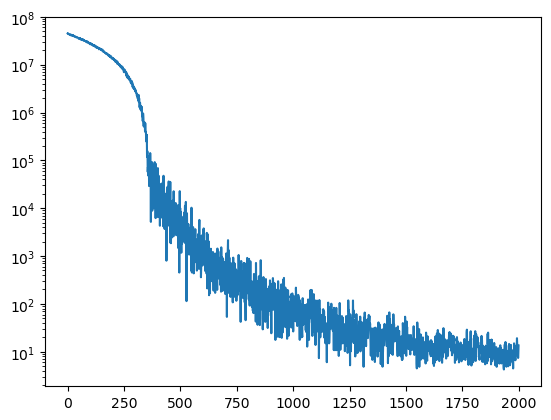

In [14]:
plt.plot(model.losses)
plt.yscale('log')

In [19]:
df = pd.read_csv('2d_gaussian_3_visits_std-0.05.csv')
preds = ['intercept', 'age']
targets = ['y1']

In [25]:
X_re, X_mask, Y_re, Y_mask = get_restructured_data(df, preds, targets, 'id')
print(X_re.shape)
print(Y_re.shape)
print(Y_mask.shape)

torch.Size([3, 3000, 2])
torch.Size([3, 3000, 1])
torch.Size([3, 3000])


In [29]:
probs = model.classify(X_re, Y_real=Y_re, Y_real_mask=Y_mask)

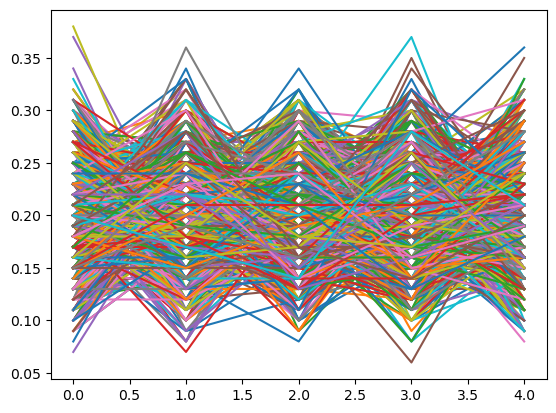

In [33]:
plt.plot(probs.T);